# Exploring Adult Data Set [UCI ML] -- Reference: https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('adult.data')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,YE
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Basic describe function allows us to very quickly look at some basic descriptive statistics for the numerical features in the dataset

In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Using Pandas Profiling, we can generate a Detailed Report with Analysis

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='Pandas_Profiling_Report.html')

## For step by step analysis follow instructions as below:

**Value Counts**, used to see distribution of categorical variables. For e.g to see the distribution of marital-status

In [5]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

To **visualise** we can quickly create a bar plot as below

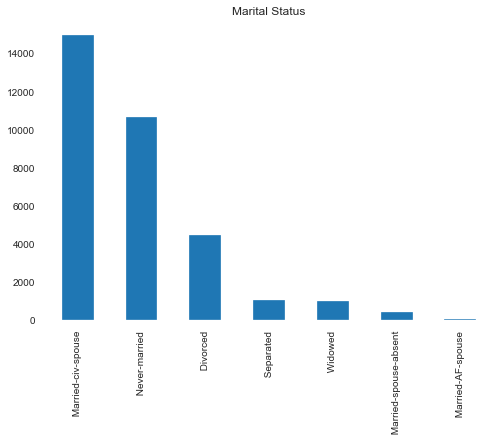

In [8]:
plt.title('Marital Status')
data['marital-status'].value_counts().plot.bar()

Plotting with value counts **doesn’t work** well when we explore a field with high cardinality (a **large** number of **unique** values)

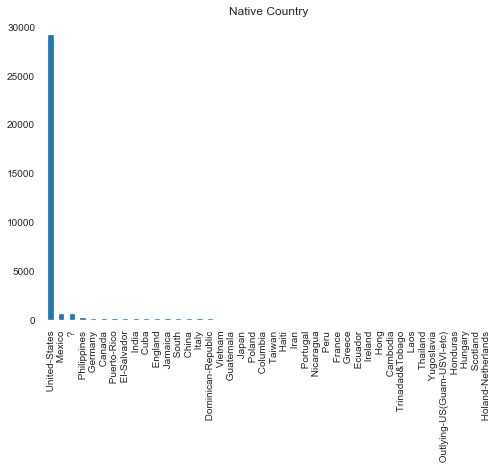

In [9]:
plt.title('Native Country')
data['native-country'].value_counts().plot.bar()

For such fileds **value_counts** can be used to get **top** values e.g top 10 as below

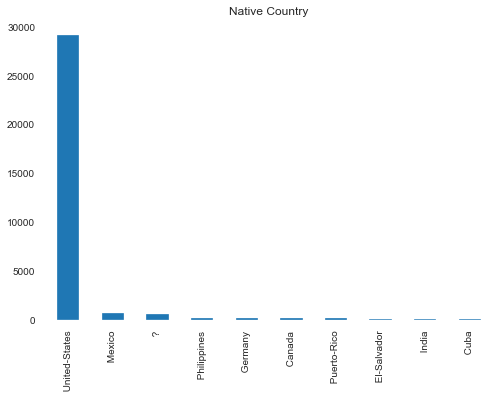

In [10]:
plt.title('Native Country')
data['native-country'].value_counts().nlargest(10).plot.bar()

Using **Group By** to take MEAN @ YE - Income Range / Yearly Earnings

In [12]:
round(data.groupby(['YE']).mean(),2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
YE,,,,,,
<=50K,36.78,190340.87,9.60,148.75,53.14,38.84
>50K,44.25,188005.00,11.61,4006.14,195.00,45.47


**Group By** on categorical data e.g Gender / Sex

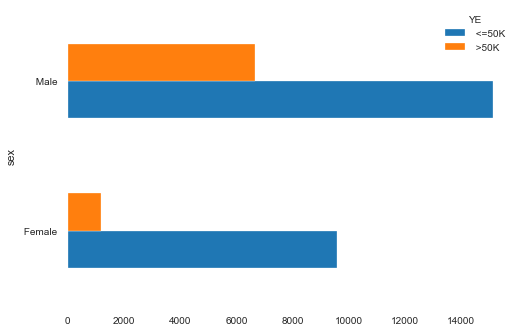

In [14]:
data.groupby('YE').sex.value_counts().unstack(0).plot.barh()

**Pivot** is used to tranform the data

In [16]:
pivot_workclass = pd.pivot_table(data, values=['hours-per-week'],
                                 index = 'sex',
                                 columns = 'YE', aggfunc=np.mean, fill_value=0)

In [17]:
pivot_workclass

hours-per-week           
YE               <=50K       >50K
sex                              
 Female      35.916701  40.426633
 Male        40.693879  46.366106

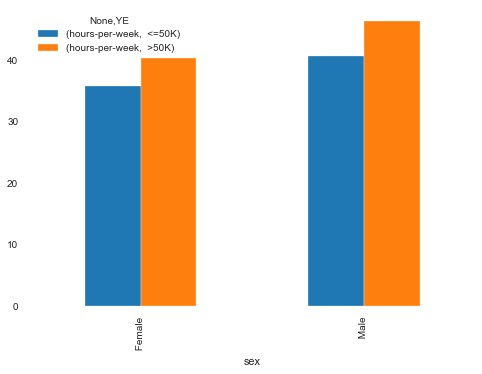

In [19]:
pivot_workclass = pd.pivot_table(data, values=['hours-per-week'],
                                 index = 'sex',
                                 columns = 'YE', aggfunc=np.mean, fill_value=0).plot.bar()